In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

#from rdkit import Chem
#from rdkit.Chem.Draw import IPythonConsole
#from rdkit.Chem import Draw

import shap
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import make_scorer ,mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error

from scipy.stats import skew

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate , cross_val_score

In [3]:
data= pd.read_csv("data\CEPDB_25000.csv")

In [4]:
data.head()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str,ml_phase
0,1503301,C1C=c2c-3c([SiH2]c4cc[nH]c-34)c3cnc(cc3c2=C1)-...,C21H13N5SSi,395.5207,8.236346,0.641905,197.474780,-5.241905,1.463722,-3.778183,[nH]1ccc2[SiH2]c3c(-c12)c1=CCC=c1c1cc(ncc31)-c...,train
1,2540778,[SiH2]1C=c2ccc3sc4c([nH]c5cc(-c6scc7C=C[SiH2]c...,C24H17NS2Si3,467.7953,5.738034,0.427601,206.524926,-5.027601,1.427000,-3.600601,[nH]1c2cc(-c3scc4C=C[SiH2]c34)c3=C[SiH2]C=c3c2...,train
2,615142,c1[nH]cc2c1ccc1cnc3cc4cc([se]c4cc3c21)-c1ncncn1,C20H11N5Se,400.3019,5.038762,0.873908,88.737230,-5.473908,2.042885,-3.431022,c1cc2cnc3cc4cc([se]c4cc3c2c2c[nH]cc12)-c1ncncn1,train
3,124449,C1C=c2c(cc3ccc4c5cnccc5c5cocc5c4c3c2=C1)-c1cccs1,C26H15NOS,389.4765,3.507048,0.732531,73.682314,-5.332531,2.162777,-3.169754,c1ccc(s1)-c1cc2ccc3c4cnccc4c4cocc4c3c2c2=CCC=c12,train
4,1008442,C1cc2ccc3sc4cc5ccc6c[SiH2]cc6c5cc4c3c2c1,C21H14SSi,326.4936,4.020859,0.630730,98.112205,-5.230730,1.978195,-3.252535,c1cc2sc3cc4ccc5c[SiH2]cc5c4cc3c2c2cCcc12,train


In [5]:
data.columns

Index(['id', 'SMILES_str', 'stoich_str', 'mass', 'pce', 'voc', 'jsc',
       'e_homo_alpha', 'e_gap_alpha', 'e_lumo_alpha', 'tmp_smiles_str',
       'ml_phase'],
      dtype='object')

In [4]:
data=data.drop(["ml_phase","id"],axis=1)

In [5]:
data

,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
0,C1C=c2c-3c([SiH2]c4cc[nH]c-34)c3cnc(cc3c2=C1)-...,C21H13N5SSi,395.5207,8.236346,0.641905,197.474780,-5.241905,1.463722,-3.778183,[nH]1ccc2[SiH2]c3c(-c12)c1=CCC=c1c1cc(ncc31)-c...
1,[SiH2]1C=c2ccc3sc4c([nH]c5cc(-c6scc7C=C[SiH2]c...,C24H17NS2Si3,467.7953,5.738034,0.427601,206.524926,-5.027601,1.427000,-3.600601,[nH]1c2cc(-c3scc4C=C[SiH2]c34)c3=C[SiH2]C=c3c2...
2,c1[nH]cc2c1ccc1cnc3cc4cc([se]c4cc3c21)-c1ncncn1,C20H11N5Se,400.3019,5.038762,0.873908,88.737230,-5.473908,2.042885,-3.431022,c1cc2cnc3cc4cc([se]c4cc3c2c2c[nH]cc12)-c1ncncn1
3,C1C=c2c(cc3ccc4c5cnccc5c5cocc5c4c3c2=C1)-c1cccs1,C26H15NOS,389.4765,3.507048,0.732531,73.682314,-5.332531,2.162777,-3.169754,c1ccc(s1)-c1cc2ccc3c4cnccc4c4cocc4c3c2c2=CCC=c12
4,C1cc2ccc3sc4cc5ccc6c[SiH2]cc6c5cc4c3c2c1,C21H14SSi,326.4936,4.020859,0.630730,98.112205,-5.230730,1.978195,-3.252535,c1cc2sc3cc4ccc5c[SiH2]cc5c4cc3c2c2cCcc12
...,...,...,...,...,...,...,...,...,...,...
24995,C1C=c2ccc3[SiH2]c4c([nH]c5cc(oc45)-c4scc5[SiH2...,C21H15NOSSi2,385.5935,2.045460,0.156053,201.727494,-4.756053,1.445501,-3.310552,[nH]1c-2c([SiH2]c3ccc4=CCC=c4c-23)c2oc(cc12)-c...
24996,C1C=c2ccc3cc4[se]c5C=C(Cc5c4cc3c2=C1)C1=CC=CC1,C23H16Se,371.3394,2.097438,0.292111,110.506690,-4.892111,1.901301,-2.990811,C1=CC=C(C1)C1=Cc2[se]c3cc4ccc5=CCC=c5c4cc3c2C1
24997,C1C=Cc2ccc3c(sc4cc(-c5nccs5)c5c[nH]cc5c34)c12,C20H12N2S2,344.4608,2.183358,0.434750,77.291785,-5.034750,2.132758,-2.901991,C1=Cc2ccc3c(sc4cc(-c5nccs5)c5c[nH]cc5c34)c2C1
24998,c-1c[s]-c2c-1ccc1c3ncccc3c3ccccc3c21,C19H11NS,285.3689,0.486618,1.304193,5.742402,-5.904193,3.278545,-2.625648,c1c-c2ccc3c4ncccc4c4ccccc4c3c2-[s]1


# Data Cleaning


This dataset was already maximally pre-processed (https://www.repository.cam.ac.uk/handle/1810/318115) and stratified sampling was then applied to derive a set of 25,000 candidate CSO donors for computational reasons

In [6]:
data.tmp_smiles_str

0        [nH]1ccc2[SiH2]c3c(-c12)c1=CCC=c1c1cc(ncc31)-c...
1        [nH]1c2cc(-c3scc4C=C[SiH2]c34)c3=C[SiH2]C=c3c2...
2          c1cc2cnc3cc4cc([se]c4cc3c2c2c[nH]cc12)-c1ncncn1
3         c1ccc(s1)-c1cc2ccc3c4cnccc4c4cocc4c3c2c2=CCC=c12
4                 c1cc2sc3cc4ccc5c[SiH2]cc5c4cc3c2c2cCcc12
                               ...                        
24995    [nH]1c-2c([SiH2]c3ccc4=CCC=c4c-23)c2oc(cc12)-c...
24996       C1=CC=C(C1)C1=Cc2[se]c3cc4ccc5=CCC=c5c4cc3c2C1
24997        C1=Cc2ccc3c(sc4cc(-c5nccs5)c5c[nH]cc5c34)c2C1
24998                  c1c-c2ccc3c4ncccc4c4ccccc4c3c2-[s]1
24999    c1sc(-c2sc(-c3ccc(cn3)-c3ccccn3)c3ccCc23)c2sccc12
Name: tmp_smiles_str, Length: 25000, dtype: object

# Information about dataset
* Distribution of reported PCE
* Schematics of expressions of somes molecules

In [9]:
data.describe()

,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,415.560570,4.126613,0.579165,123.320601,-5.179165,1.895249,-3.283916
std,59.575976,2.407685,0.285351,64.269393,0.285351,0.396566,0.366131
min,172.186200,0.000109,0.000012,3.882689,-6.496841,0.799452,-3.999917
25%,379.437700,2.247589,0.373424,72.329945,-5.361342,1.607647,-3.568905
50%,415.558800,3.582067,0.555968,114.218791,-5.155968,1.877308,-3.278469
75%,455.588700,5.739375,0.761342,164.150991,-4.973424,2.172793,-3.013955
max,639.465000,11.097616,1.896841,354.253069,-4.600012,3.402620,-1.629426


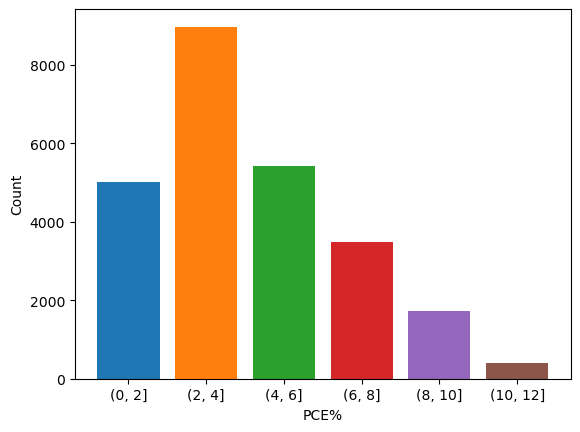

In [7]:
data['pce_pair'] = pd.cut(data['pce'], bins=[0, 2, 4, 6, 8, 10,12])
pce_count = data.groupby('pce_pair').size()

colors = plt.cm.tab10(np.arange(len(pce_count)))

plt.bar(pce_count.index.astype(str), pce_count.values, color=colors)
plt.xlabel('PCE%')
plt.ylabel('Count')
plt.show()



In [10]:
#print(data['SMILES_str'][0])
#Chem.MolFromSmiles(data['SMILES_str'][0])

* Additionals informations

In [11]:
profile = ProfileReport(
    data,
    title="Profiling Report",
    html={'style':{'full_width':True}}
)

profile.to_file(output_file = "data-profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Feature Engineering

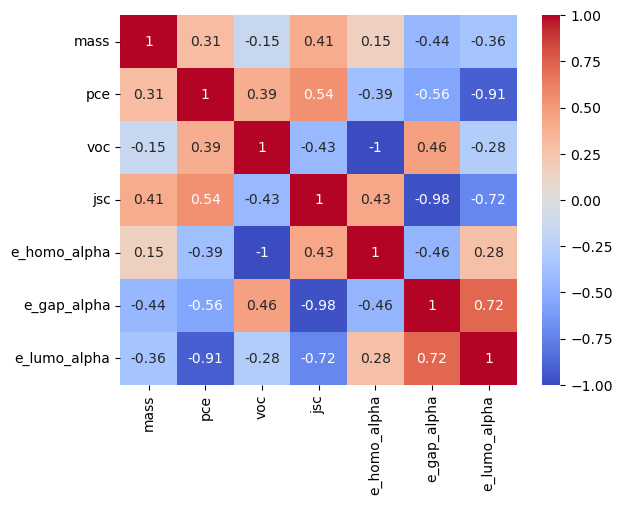

In [8]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

Feature importance using SHAP values based on

* XGBoost
* Random Forest
* Desicion Trees
* K-nearest neighbors

In [9]:
X=data.drop(["SMILES_str","stoich_str","pce","tmp_smiles_str","pce_pair"],axis=1)
y=data["pce"]

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


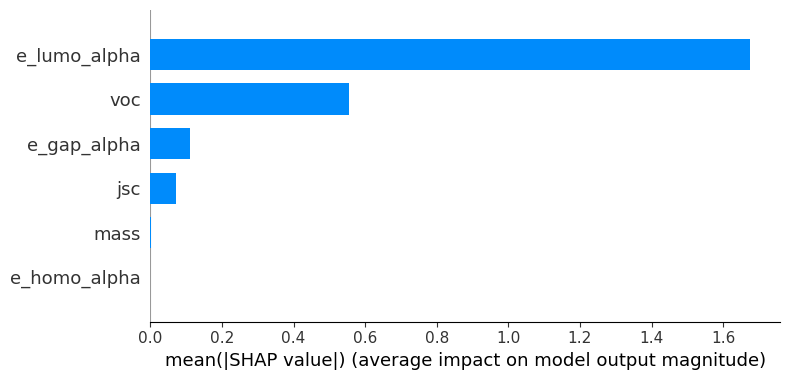

In [14]:
# With XGBOOST
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X, y)

explainer = shap.Explainer(model)
shap_values = explainer(X)

shap.summary_plot(shap_values, X, plot_type='bar', show=False)

In [ ]:
# With Random Forest
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,random_state=2)
            
# Fit rf to the training set    
rf.fit(X, y) 

# Create a SHAP object by using TreeExplainer
explainer = shap.TreeExplainer(rf)

# Call the explain method by using entry data
shap_values = explainer(X)

# Display a barplot which show the importance of each features
shap.summary_plot(shap_values, X, plot_type='bar', show=False)


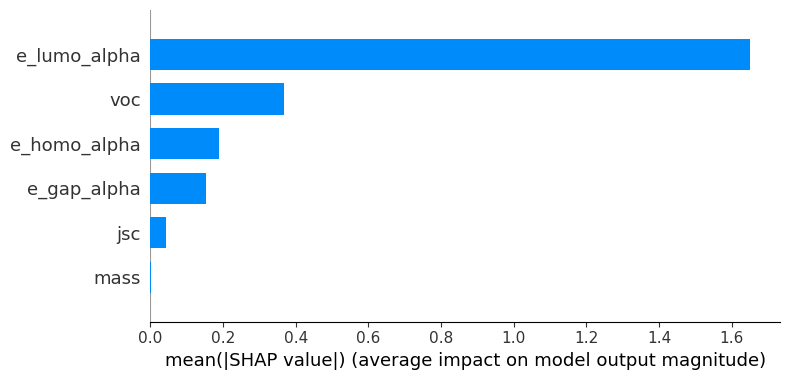

In [16]:
# With decesionTree
from sklearn.tree import DecisionTreeRegressor
# Entraînement du modèle
model = DecisionTreeRegressor(random_state=0)
model.fit(X, y)

# Calcul des valeurs d'importance avec SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Identificaton des features à supprimer
#feature_importance = shap_values.mean(axis=0)
#least_important = feature_importance.argsort()[:5]

# Display a barplot which show the importance of each features
shap.summary_plot(shap_values, X, plot_type='bar', show=False)


Exact explainer: 25001it [19:14, 21.46it/s]                                                                            


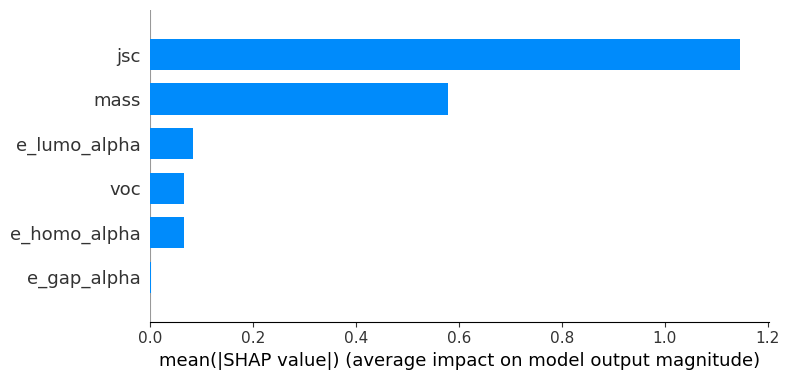

In [14]:
# With KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


# Entraînement du modèle KNN
model = KNeighborsRegressor()
model.fit(X, y)

# Calcul des valeurs d'importance avec SHAP
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)


# Display a barplot which show the importance of each features
shap.summary_plot(shap_values, X, plot_type='bar', show=False)


In [ ]:
##Conclusion
"""
Après avoir effectué une analyse approfondie en utilisant les quatre modèles de Machine Learning, à savoir Random Forest, XGBoost, Decision Tree et KNN, il est recommandé de garder tous les features dans le jeu de données. Bien que chaque modèle puisse avoir une importance relative différente pour chaque feature, l'ensemble complet de features offre une variété d'informations qui peuvent améliorer la qualité de la prédiction finale.

De plus, en gardant tous les features, nous avons la possibilité de mettre en place des techniques de feature engineering pour améliorer davantage les performances des modèles. Cela pourrait inclure la création de nouvelles features en combinant ou en transformant des features existants.

En fin de compte, la décision de garder ou de supprimer des features dépendra des objectifs de l'analyse et de la qualité des données. Cependant, dans ce cas, l'ensemble complet de features est recommandé pour tirer le meilleur parti des modèles de Machine Learning utilisés.
"""

# Model Construction 

To select the appropriate regression model , we must train and validate differents models on our train/validation data and compare the metrics

* XGBoost
* Random Forest
* Desicion Trees
* K-nearest neighbors

In [16]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# We can drop mass & e_homo_alpha because they have no impact on the ouptut
X=data.drop(["SMILES_str","stoich_str","pce","tmp_smiles_str","pce_pair","mass", "e_homo_alpha"],axis=1)

# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25, random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test =  MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.04
